## PyTorch Workflow

In [1]:
import torch
from torch import nn 
import matplotlib.pyplot as plt

torch.__version__


'2.3.1+cpu'

## Data - Preparing and loading
Use a linear regression formula to make a straight line with known parameters

In [2]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [3]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

### Exploring the relationship between X and y
Splitting data into training and testing

In [5]:
train_split = int(0.8 *len(X))
train_split

40

In [6]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test)

(40, 10)

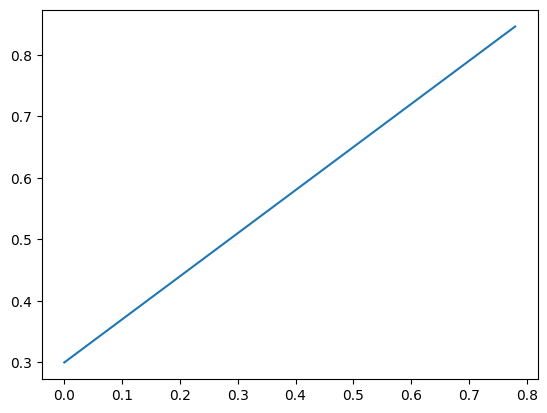

In [7]:
plt.plot(X_train, y_train)
plt.show()

In [8]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    """
    Plots training data, test data and compare predictions
    """
    plt.figure(figsize=(10,7))

    # plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label = "Training data")

    # plot training data in blue
    plt.scatter(test_data, test_labels, c="g", s=4, label = "Testing data")

    #to check if there are predictions
    if predictions is not None:
        #plot the predictions if they exist
        plt.scatter(test_data, predictions,  c="r", s=4, label="predictions")

    plt.legend(prop={"size":14})

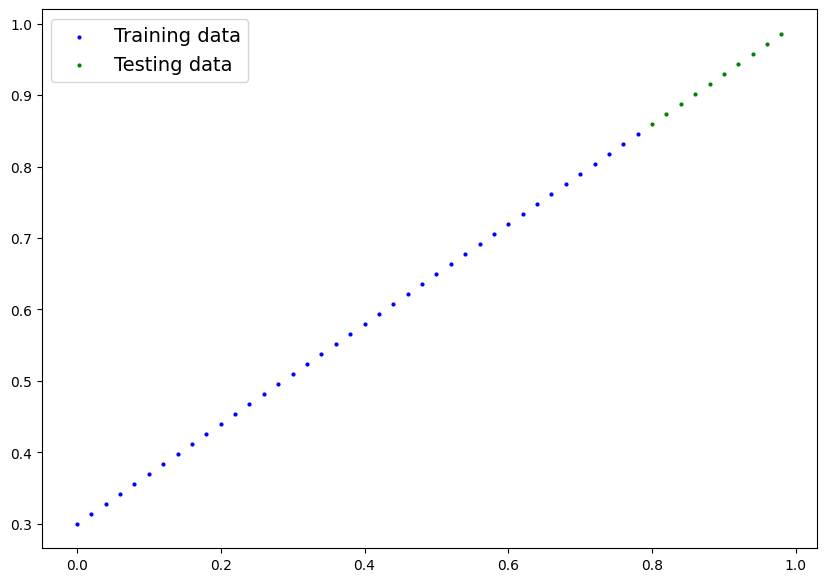

In [9]:
plot_predictions()

### Model Building
1. Create linear regression class model

In [10]:
#almost everything from pytorch inherits from nn.module
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
        # write forward method to define the computation in the model
    def forward(self, x: torch.tensor) -> torch.tensor:
        return self.weights * x + self.bias #this is the linear regression formula

### checking the contents of our pyTorch model

In [11]:
# create a random seed
torch.manual_seed(42)

# create an instance of the model (this is a subclass  of nn.module)
model = LinearRegressionModel()
model

LinearRegressionModel()

In [12]:
# check parameters
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [13]:
#list named parameters
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Predictions using `torch.inference_mode()`

In [14]:
with torch.inference_mode():
    y_preds = model(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [15]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

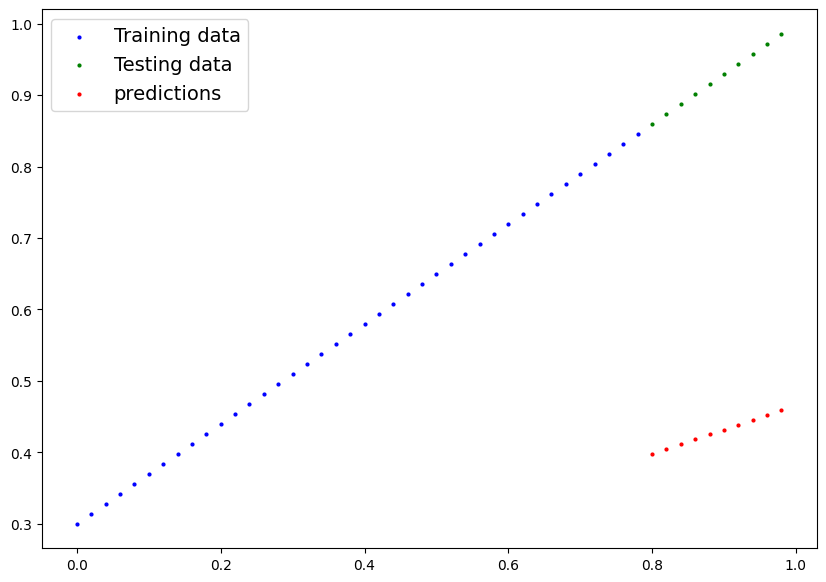

In [16]:
plot_predictions(predictions = y_preds)

* Write some code to move the red dots closer to the green dots. 
* The red dots are far away because our model was initialized with random numbers



In [17]:
loss_fn = nn.L1Loss()

#set up optimizer
optimizer = torch.optim.SGD(params=model.parameters(), lr = 0.01)

### Build a training and testing loop


In [18]:
# this is a hyperparameter becusse we set it ourself
epochs = 1
## Training
# loop through the data
for epoch in range(epochs):
    # set the model to training mode
    model.train()

    # 1. forward pass
    y_preds = model(X_train)

    # 2. calculate the lsoo
    loss = loss_fn(y_preds, y_train) 

    # 3. optimizer zer grad
    optimizer.zero_grad()

    # 4. perrm backpropagation on the lss with respect tp the parameters of the model
    loss.backward()

    # 5. step the optimizer (perform gradient descebt)
    optimizer.step()

    model.eval()
